### Julian AURIAC
### Benjamin BOURBON
### Eduardo VITAL
---

In [1]:
from scipy.optimize import newton
from scipy.stats import gumbel_r
from numpy import var
from math import pi, sqrt, exp, log, sin
from matplotlib import pyplot as plt

import numpy as np
import seaborn as sn
from scipy.special import gamma
from scipy import stats
import scipy

from numpy.linalg import det, inv, slogdet
from scipy.linalg import lu, cholesky
from random import uniform
from scipy.optimize import minimize_scalar

from scipy import special
from sklearn.neighbors import KernelDensity

# Problème 1 - Comparaison entre la méthode des moments et la méthode du maximum de vraisemblance
On considère une variable aléatoire $X$ avec une densité de probabilité donnée par :
$$
f(x) = \frac 1 \alpha e^{-\frac {x-m}{\alpha}} \exp{(e^{-\frac {x-m}{\alpha}})}
$$
où $m > 0$ et $\alpha > 0$ sont deux paramètres inconnus.

## 1. Vérifier que $f$ a une densité de probabilité valide
On cherche finalement à vérifier que :
$$
\int_{-\infty}^{+\infty} f(x) dx = 1
$$
Posons la fonction $A(x)$ telle que :
$$
A(x) = - \frac{x - m}{\alpha}
$$
On peut alors noter :
$$
f(x) = \frac{e^{A(x)}}{\alpha} \exp{(-e^{A(x)})}
$$
On pose $g(x) = \exp{(e^{A(x)})}$. Sa dérivée est alors :
$$
\begin{align}
g'(x) & = (-e^{A(x)})' g(x) \\ & = -(A(x))' e^{A(x)} g(x) \\ & = \frac 1 \alpha e^{A(x)} g(x) \\ & = f(x)
\end{align}
$$
On en déduit alors :
$$
\begin{align}
\int_{-\infty}^{+\infty} f(x) dx & = \int_{-\infty}^{+\infty} g'(x) dx \\
& =\left[ g(x) \right]_{-\infty}^{+\infty} \\
& = \lim_{x \to +\infty} g(x) - \lim_{x \to -\infty} g(x) 
\end{align}
$$
On détermine les limites suivantes :
$$
\lim_{x \to +\infty} A(x) = -\infty \quad \text{et} \quad \lim_{x \to -\infty} A(x) = +\infty
$$
$$
\lim_{x \to +\infty} e^{A(x)} = 0 \quad \text{et} \quad \lim_{x \to -\infty} e^{A(x)} = +\infty
$$
$$
\lim_{x \to +\infty} \exp{(-e^{A(x)})} = 1 \quad \text{et} \quad \lim_{x \to -\infty} \exp{(-e^{A(x)})} = 0
$$
Donc on en conclut que :
$$
\boxed{\int_{-\infty}^{+\infty} f(x) dx = 1 - 0 = 1}
$$
## 2. Soit un échantillon aléatoire $(X_i)_{i = 1, \dots, n}$ de taille $n$, proposer un estimateur pour $m$ et $\alpha$ basé sur la méthode des moments
On détermine les **moments théoriques** :
Le premier moment est donné par :
$$
m_1 = \int_{- \infty}^{+ \infty} x \ e^{A(x)} \exp(-e^{A(x)}) dx
$$
On réalise un changement de variable $y = e^{A(x)}$, c'est-à-dire :
$$
x = m - \alpha \ln(y)
$$
$$
dy = -\frac {dx} {\alpha} e^{A(x)}
$$
Donc on peut réécrire $m_1$ :
$$
m_1 = \int_{+ \infty}^0 -(m - \alpha \ln(y)) e^{-y} dy = \int_0^{+ \infty} (m - \alpha \ln(y)) e^{-y} dy = \underbrace{\int_0^{+ \infty} m e^{-y} dy}_{I_1} -  \underbrace{\int_0^{+ \infty} \alpha \ln(y) e^{-y} dy}_{I_2}
$$
Développons $I_1$ :
$$
I_1 = m \int_0^{+ \infty} e^{-y}dy = m \left[- e^{-y} \right]_0^{+\infty} =  m
$$
Développons $I_2$ :
$$
I_2 = \alpha \int_0^{+ \infty} \ln(y) e^{-y}dy
$$
On pose $g(y, \beta) = y^{\beta} e^{-y}$. On remarque que :
$$
\frac {\partial g}{\partial \beta} = \frac \partial {\partial \beta} \left[\exp(\beta \ln(y)) e^{-y}\right] = \ln(y) y^\beta e^{-y}
$$
Donc on peut réécrire $I_2$ :
$$
\begin{align}
I_2 & = \alpha \int_0^{+ \infty} \frac \partial {\partial \beta} \left[y^\beta e^{-y}\right] dy \quad [\beta = 0]\\
& = \alpha \times \frac \partial {\partial \beta} \int_0^{+ \infty} y^\beta e^{-y} dy \quad [\beta = 0]\\
&= \alpha \times \frac \partial {\partial \beta} \Gamma(\beta + 1) \quad [\beta = 0] \\
& = \alpha \times \Gamma'(1) \\
& = -\alpha \gamma
\end{align}
$$
Avec $\gamma$ la constante d'Euler ($\gamma \approx 0.577215$)
Donc on trouve :
$$
\boxed{m_1 = I_1 - I_2 = m + \alpha \gamma}
$$
Le second moment est donné par :
$$
m_2 = \int_{- \infty}^{+ \infty} x^2 \ e^{A(x)} \exp(-e^{A(x)}) dx
$$
De la même manière, on réalise le changement de variable $y = e^{A(x)}$. On obtient alors :
$$
m_2 = \int_0^{+ \infty} \underbrace{[m - \alpha \ln(y)]^2}_{S} e^{-y} dy
$$
Développons $S$ :
$$
\begin{align}
S	& = \left[ m - \alpha \ln(y) \right]^2 \\
	& = m^2 - 2 m \alpha \ln(y) + \alpha^2 \ln(y)^2 \\
\end{align}
$$
D'où :
$$
m_2 = \underbrace{\int_0^{+ \infty} m^2 e^{-y} dy}_{I_1} - \underbrace{\int_0^{+ \infty} 2 m \alpha \ln(y) e^{-y} dy}_{I_2} + \underbrace{\int_0^{+ \infty} \alpha^2 \ln(y)^2 e^{-y} dy}_{I_3}
$$
A partir des résultats précédents, il est aisé de trouver :
$$
I_1 = m^2 \int_0^{+ \infty} e^{-y} dy = m^2
$$
$$
I_2 = 2 m \alpha \int_0^{+ \infty} \ln(y) e^{-y} dy = -2 m \alpha \gamma
$$
$$
I_3 = \alpha^2 \int_0^{+ \infty} \ln(y)^2 e^{-y} dy = \alpha^2 \times \frac {\partial^2} {\partial \beta^2} \Gamma(\beta + 1)_{[\beta = 0]} = \alpha^2 \times \Gamma''(1) = \alpha^2(\gamma^2 + \frac{\pi^2}6) 
$$

Donc on trouve :
$$
\boxed{m_2 = I_1 - I_2 + I_3 = m^2 + 2 m \alpha \gamma + \alpha^2(\gamma^2 + \frac{\pi^2}6)}
$$
On exprime la relation entre les moments théoriques et le paramètres :
$$
\left\{
	\begin{array}{l}
		m_1 & = & m + \alpha \gamma \\
		m_2 & = & (m + \alpha \gamma)^2 + \alpha^2 \frac {\pi^2} 6
	\end{array}
\right.
$$
Dans la seconde relation on peut trouver $\alpha$ :
$$
m_2 = m_1^2 + \alpha^2 \frac {\pi^2} 6 \iff \alpha = \frac {\sqrt{6}} {\pi} \sqrt{m_2 - m_1^2} \text{ (car } \alpha > 0 \text{)}
$$
En remplaçant $\alpha$ dans la première relation, on trouve $m$ :
$$
m = m_1 - \alpha \gamma = m_1 - \gamma \frac {\sqrt{6}} {\pi} \sqrt{m_2 - m_1^2}
$$
Une fois cette relation établie, la méthode des moments consiste à utiliser les moments empiriques :
$$
\hat m_1 = \frac {X_1 + \dots + X_n} n \quad \text{et} \quad \hat m_2 = \frac {X_1^2 + \dots + X_n^2} n
$$
On les pose égaux aux moments théoriques :
$$
\hat m_1 = m_1 \quad \text{et} \quad \hat m_2 = m_2
$$
La résolution en $m$ et $\alpha$ nous donne :
$$
\boxed{
	\left\{
		\begin{array}{l}
			\hat m & = & \hat m_1 - a \sqrt{\hat m_2 - \hat m_1^2} \\
			\hat \alpha & = & b \sqrt{\hat m_2 - \hat m_1^2}
		\end{array}
	\right.
}
$$
où $a = \gamma \frac {\sqrt{6}} {\pi}$ et $b = \frac {\sqrt{6}} {\pi}$.

## 3. Soit un échantillon aléatoire $(X_i)_{i = 1, \dots, n}$ de taille $n$, calculer le log de vraisemblance en fonction de $m$ et $\alpha$
Soit la vraisemblance :
$$
\begin{align}
L(x_1 , \dots x_n ; m , \alpha)	& = \prod_{i = 1}^n \frac 1 {\alpha} e^{A(x_i)} \exp(e^{A(x_i)}) \\
	& = \prod_{i = 1}^n \frac 1 {\alpha} \times \prod_{i = 1}^n e^{A(x_i)} \times \prod_{i = 1}^n \exp(-e^{A(x_i)}) \\
	& = \frac 1 {\alpha^n} \times \prod_{i = 1}^n e^{A(x_i)} \times \prod_{i = 1}^n \exp(-e^{A(x_i)}) \\
\end{align}
$$
Le log de vraisemblance est alors :
$$
\begin{align}
\ln(L(x_1 , \dots x_n ; m , \alpha))	& = -n \ln(\alpha) + \sum_{i = 1}^n \ln(e^{A(x_i)}) + \sum_{i = 1}^n \ln(\exp(-e^{A(x_i)})) \\
	& = -n \ln(\alpha) + \sum_{i = 1}^n A(x_i) - \sum_{i = 1}^n e^{A(x_i)} \\
\end{align}
$$
Ainsi, la dérivée partielle sur $m$ donne :
$$
\frac {\partial L(x_1 , \dots x_n ; m , \alpha)} {\partial m} = \frac n {\alpha} - \sum_{i = 1}^n \frac 1 {\alpha} e^{A(x_i)} = \frac 1 {\alpha} \left( n - \sum_{i = 1}^n e^{A(x_i)} \right) = 0
$$
Et la dérivée seconde en $\alpha$ donne :
$$
\frac {\partial L(x_1 , \dots x_n ; m , \alpha)} {\partial \alpha} = \frac {-n} {\alpha} + \sum_{i = 1}^n \frac {x_i - m} {\alpha^2} - \sum_{i = 1}^n \frac {x_i - m} {\alpha^2} e^{A(x_i)} = 0
$$
Ce qui nous permet de déduire deux relations. La première s'obtient de la façon suivante :
$$
\frac 1 {\alpha} \left( n - \sum_{i = 1}^n e^{A(x_i)} \right) = 0
$$
$$
\iff n = \sum_{i = 1}^n e^{A(x_i)}
$$
$$
	\iff n = e^{\frac m {\alpha}} \times \sum_{i = 1}^n e^{\frac {-x_i} {\alpha}}
$$
$$
	\iff \frac n {\sum_{i = 1}^n e^{\frac {-x_i} {\alpha}}} = e^{\frac m {\alpha}}
$$

$$
	\iff \frac m {\alpha} = \ln(n) - \ln \sum_{i = 1}^n e^{\frac {-x_i} {\alpha}}
$$
$$
	\iff \boxed{
		m = \alpha \ln(n) - \alpha \ln \sum_{i = 1}^n e^{\frac {-x_i} {\alpha}}
	}
$$
Et pour la seconde relation, on l'obtient de la façon suivante :
$$
\frac {-n} {\alpha} + \sum_{i = 1}^n \frac {x_i - m} {\alpha^2} - \sum_{i = 1}^n \frac {x_i - m} {\alpha^2} e^{A(x_i)} = 0
$$
$$
\iff \frac {-n} {\alpha} + \frac 1 {\alpha^2} \sum_{i = 1}^n x_i - \frac {n m} {\alpha^2} - \left[ \frac 1 {\alpha^2} \sum_{i = 1}^n x_i e^{A(x_i)} - \frac m {\alpha^2} \sum_{i = 1}^n e^{A(x_i)} \right] = 0
$$
$$
\iff \frac {-n} {\alpha} + \frac {n \bar x} {\alpha^2} - \frac {n m} {\alpha^2} + \frac {n m} {\alpha^2} - \frac 1 {\alpha^2} \left[ e^{\frac m {\alpha}} \sum_{i = 1}^n x_i e^{-\frac {x_i} {\alpha}} \right] = 0
$$
$$
\iff \frac {-n} {\alpha} + \frac {n \bar x} {\alpha^2} - \frac n {\alpha^2} \frac {\sum_{i = 1}^n x_i e^{-\frac {x_i} {\alpha}}} {\sum_{i = 1}^n e^{-\frac {x_i} {\alpha}}} = 0
$$
$$
\iff \frac n {\alpha} \left[ -1 + \frac {\bar x} {\alpha} - \frac 1 {\alpha} \frac {\sum_{i = 1}^n x_i e^{-\frac {x_i} {\alpha}}} {\sum_{i = 1}^n e^{-\frac {x_i} {\alpha}}} \right] = 0
$$
$$
\iff \boxed{\bar x = \alpha + \frac {\sum_{i = 1}^n x_i e^{-\frac {x_i} {\alpha}}} {\sum_{i = 1}^n e^{-\frac {x_i} {\alpha}}}}
$$
avec $\bar x = \frac 1 n \sum_{i=1}^n x_i$

La résolution de $m$ et $\alpha$ nous donne alors :
$$
\boxed{
	\left\{
		\begin{array}{l}
			m = \alpha \ln(n) - \alpha \ln \sum_{i = 1}^n e^{\frac {-x_i} {\alpha}} \\
			\bar x = \alpha + \frac {\sum_{i = 1}^n x_i e^{-\frac {x_i} {\alpha}}} {\sum_{i = 1}^n e^{-\frac {x_i} {\alpha}}}
		\end{array}
	\right.
}
$$
Pour trouver $\alpha$, on utilisera une méthode de Newton.

## 4. X suit une distribution de Gumbel. Proposer une ou plusieurs illustrations numériques de la convergence des estimateurs proposés suivant une taille d'échantillonnage $n$ et les valeurs des paramètres inconnus. En particulier, se concentrer sur la comparaison de l'efficacité entre les deux méthodes
 

In [2]:
MAX = 2005  # maximum of size
REPEAT = 100  # number of times to repeat the experience for an arbitrary size
SIZES = list(range(5, int(MAX), 5))  # list of sizes
PARAMETERS = [(0, 1), (1.2, 2.3), (5.2, 3.8)] # parameters of Gumbel distribution

In [3]:
def moments_method(params):
    """
    Method of moments
    """
    GAMMA = 0.577
    A = sqrt(6) / pi
    m_values = []
    alpha_values = []
    m_variances = []
    alpha_variances = []

    for size in SIZES:
        m = 0
        alpha = 0
        m_var = []
        alpha_var = []
        for _ in range(REPEAT):
            values = gumbel_r.rvs(loc=params[0], scale=params[1], size=size)
            m1 = sum(values) / size
            m2 = sum(map(lambda x: x * x, values)) / size
            alpha_ = sqrt((m2 - m1 * m1)) * A
            m_ = m1 - GAMMA * alpha_
            m_var.append(m_)
            alpha_var.append(alpha_)
            alpha += alpha_
            m += m_
        m_values.append(m / REPEAT)
        alpha_values.append(alpha / REPEAT)
        m_variances.append(var(m_var))
        alpha_variances.append(var(alpha_var))

    return m_values, alpha_values, m_variances, alpha_variances

In [4]:
def maximum_likelihood_method(params):
    """
    Method of Maximum Likelihood
    """
    f = (
        lambda alpha, *args: alpha
        + sum(map(lambda v: v * exp(-v / alpha), args[0]))
        / sum(map(lambda v: exp(-v / alpha), args[0]))
        - args[1]
    )
    m_values = []
    alpha_values = []
    m_variances = []
    alpha_variances = []

    for size in SIZES:
        m = 0
        alpha = 0
        m_var = []
        alpha_var = []
        for _ in range(REPEAT):
            values = gumbel_r.rvs(loc=params[0], scale=params[1], size=size)
            mean = sum(values) / size
            alpha_ = newton(f, 1, args=(values, mean))
            m_ = alpha_ * log(size) - alpha_ * log(sum(map(lambda v: exp(-v / alpha_), values)))
            m_var.append(m_)
            alpha_var.append(alpha_)
            alpha += alpha_
            m += m_

        m_values.append(m / REPEAT)
        alpha_values.append(alpha / REPEAT)
        m_variances.append(var(m_var))
        alpha_variances.append(var(alpha_var))

    return m_values, alpha_values, m_variances, alpha_variances

In [5]:
values = {
    "mm_method": [moments_method(params) for params in PARAMETERS],
    "ml_method": [maximum_likelihood_method(params) for params in PARAMETERS],
}

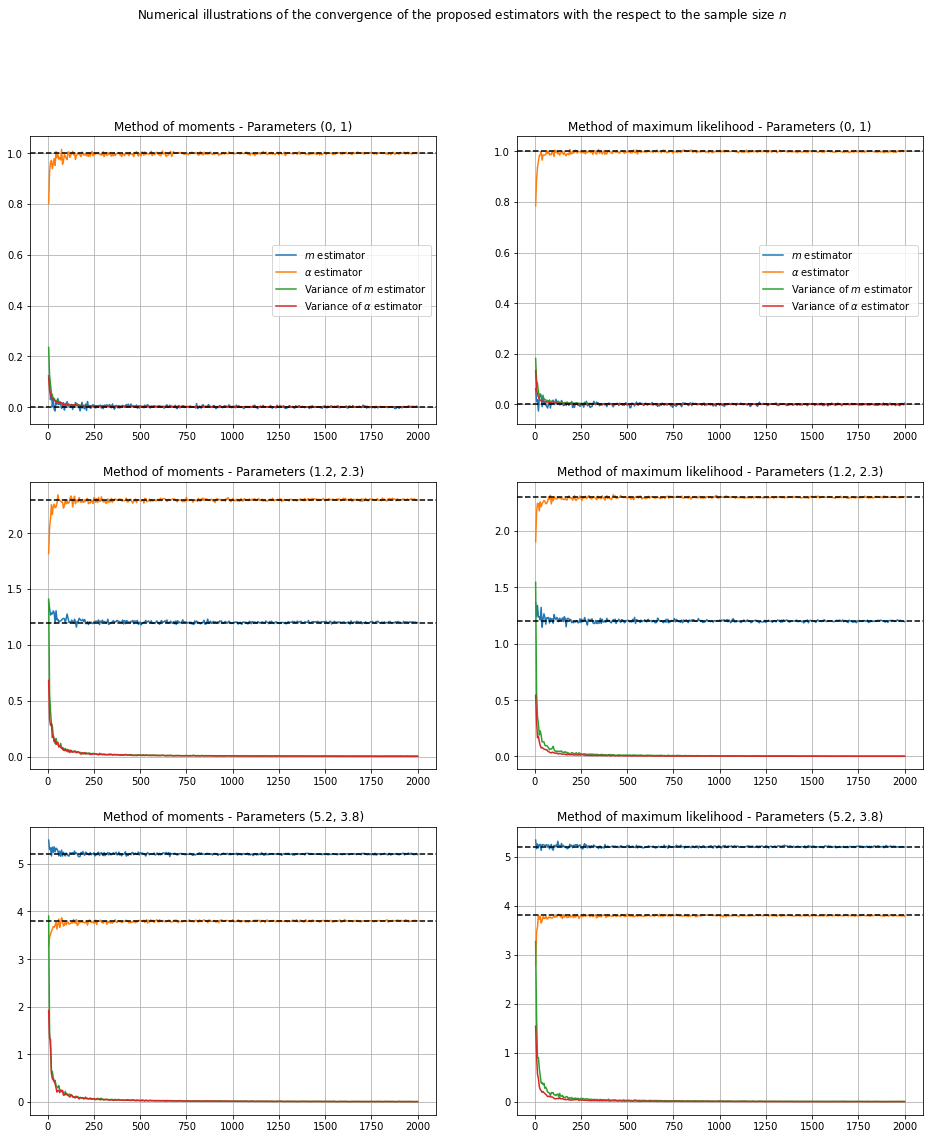

In [6]:
fig, ax = plt.subplots(len(PARAMETERS), 2, figsize=(16, 6 * len(PARAMETERS)))
axes = [ax] if len(PARAMETERS) == 1 else ax

labels = [
    "$m$ estimator",
    "$\\alpha$ estimator",
    "Variance of $m$ estimator",
    "Variance of $\\alpha$ estimator",
]

for i, (mm, ml) in enumerate(axes):
    for j, label in enumerate(labels):
        mm.plot(SIZES, values["mm_method"][i][j], label=label)
    mm.set_title(f"Method of moments - Parameters {PARAMETERS[i]}")
    mm.axhline(y=PARAMETERS[i][0], color="black", linestyle="--")
    mm.axhline(y=PARAMETERS[i][1], color="black", linestyle="--")
    mm.grid()
    if i == 0:
        mm.legend()

    for j, label in enumerate(labels):
        ml.plot(SIZES, values["ml_method"][i][j], label=label)
    ml.set_title(f"Method of maximum likelihood - Parameters {PARAMETERS[i]}")
    ml.axhline(y=PARAMETERS[i][0], color="black", linestyle="--")
    ml.axhline(y=PARAMETERS[i][1], color="black", linestyle="--")
    ml.grid()
    if i == 0:
        ml.legend()

fig.suptitle(
    "Numerical illustrations of the convergence of the proposed estimators with the respect to the sample size $n$"
)
plt.show()

On se place dans le cas où on réalise `REPEAT` fois la même expérience pour une taille d'échantillon fixée. Autrement dit, la taille d'échantillon varie de $5$ à $2000$ et pour on tire `REPEAT` fois un échantillon pour obtenir une moyenne de l'estimateur. Les illustrations numériques des estimateurs montrent bien leur convergence.

De plus, pour le deux méthodes, la variance diminue quand $n$ tend vers $+\infty$ et elle tend vers $0$.

On s'intéresse à l'efficacité entre les deux méthodes.

In [7]:
def efficiency(list_estimator_1, list_estimator_2):
    return [x / y for x, y in zip(list_estimator_1, list_estimator_2)]

var_m = lambda method, i: values[method][i][2]
var_alpha = lambda method, i: values[method][i][3]

In [8]:
efficiencies = {
    params: [
        efficiency(var_m("mm_method", i), var_m("ml_method", i)),
        efficiency(var_alpha("mm_method", i), var_alpha("ml_method", i)),
    ]
    for i, params in enumerate(PARAMETERS)
}

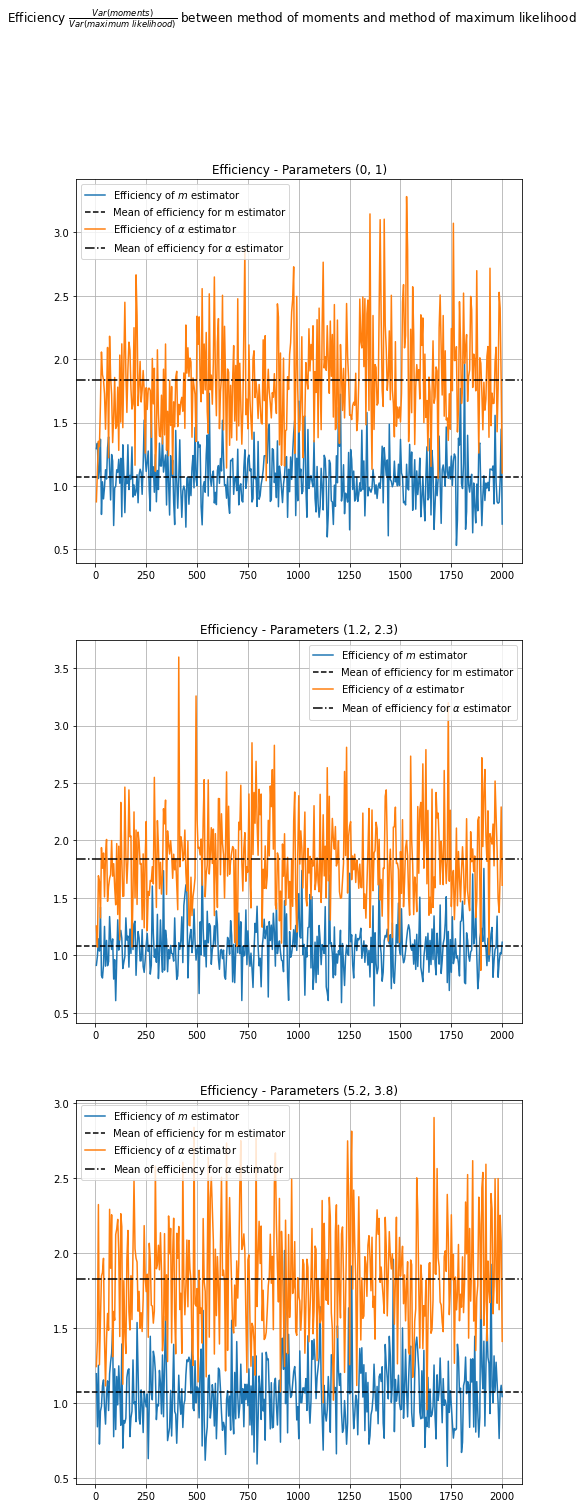

In [9]:
fig2, ax2 = plt.subplots(len(efficiencies), 1, figsize=(8, 8 * len(efficiencies)))

labels2 = ["Efficiency of $m$ estimator", "Efficiency of $\\alpha$ estimator"]

for i, axis in enumerate(ax2):
    for j, label in enumerate(labels2):
        axis.plot(SIZES, efficiencies[PARAMETERS[i]][j], label=label)
        axis.axhline(
            y=sum(efficiencies[PARAMETERS[i]][j])/len(efficiencies[PARAMETERS[i]][j]), 
            color="black", 
            linestyle="-." if j else "--",
            label="Mean of efficiency for " + ("$\\alpha$" if j else "m") + " estimator",
        )
    axis.set_title(f"Efficiency - Parameters {PARAMETERS[i]}")
    axis.grid()
    axis.legend()

fig2.suptitle(
    "Efficiency $\\frac{Var(moments)}{Var(maximum \\ likelihood)}$ between method of moments and method of maximum likelihood"
)
plt.show()

On remarque que le rapport $\frac{Var(moments)}{Var(maximum \ likelihood)} > 1$. Autrement dit, 
$$
\boxed{Var(moments) > Var(maximum \ likehood)}
$$
Donc la méthode du maximum de vraisemblance a un variance plus faible que la méthode des moments. On peut donc en conclure que la méthode du maximum de vraisemblance est **plus efficace** que la méthode des moments.

---

# Problème 2 - Calibration des hyper-paramètres d'une régression de processus gaussien par le maximum de vraisemblance
## 1.a En notant $m = (m(x_1 ), ..., m(x_n))$, que vaut la moyenne et la matrice de covariance du vecteur aléatoire $m + L^t G$
On rappelle plusieurs notions. La fonction caratéristique d'un vecteur gaussien est :
$$
\phi_X(x) = \mathbb E\left[e^{i<x, X>}\right]
$$
De plus, si $X \sim \mathcal N(m, \Sigma)$ telle que $\Sigma$ est la matrice de covariance, alors on a :
$$
\phi_X(x) = e^{i<x, m>} \times e^{-\frac 1 2 <x, \Sigma x>}
$$
On pose $\Sigma = L^T L$ où $L$ est la matrice triangulaire inférieure de $\Sigma$. On note $I_n$ la matrice identité de rang $n$.

On cherche à montrer que, pour $G \sim \mathcal N(0, I_n)$, on a $m + L^T G \sim \mathcal N(m, \Sigma)$.
Posons $X = m + L^T G$.
$$
\begin{align}
\phi_X(x)	& = \mathbb E \left[ e^{i < x , X >} \right] \\
	& = \mathbb E \left[ e^{i < x , L^T G + m >} \right] \\
	& = \mathbb E \left[ e^{i < x , L^T G >} \times e^{i < x , m >} \right] \\
	& = \mathbb E \left[ e^{i < x , L^T G >} \right] \times e^{i < x , m >} \\
	& = \mathbb E \left[ e^{i < L x , G >} \right] \times e^{i < x , m >} \\
	& = \phi_G(L x) \times e^{i < x , m >} \\
	& = e^{i < 0 , L x > - \frac 1 2 < L x , I_n L x >} \times e^{i < x , m >} \\
	& = e^{-\frac 1 2 < L x , L x >} \times e^{i < x , m >} \\
	& = e^{-\frac 1 2 < x , L^T L x >} \times e^{i < x , m >} \\
	& = e^{-\frac 1 2 < x , \Sigma x >} \times e^{i < x , m >} \\
\end{align}
$$
Donc :
$$
\boxed{\phi_X(x) = e^{i < x , m >} \times e^{-\frac 1 2 < x , \Sigma x >}}
$$
D'où $X \sim \mathcal N(m, \Sigma)$


## 1.b - e Simuler plusieurs réalisations d’un processus Gaussien de moyenne nulle et de fonction de covariance

In this part of the exercise we search to use the given kernel and the Cholesky decomposition to compute multiple realisations (10) of $z = L^T g$, where z is a vector of N elements. For a large number of N, however, the Cholesky decomposition failed, once the covariance matrix `sigma`, generated by the kernel, was not positive semidefinite. In this way, a fixed value of `N = 100` was set.

The objective was also to analyse the influence of the  $\lambda$ parameter used by the kernel, in a way the all the experiments were repeated for different values of $\lambda$, going from 2 to 0.01.

In [2]:
def cov(arr, lamb=1):
    N = arr.size
    cov_mat = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            d = np.linalg.norm(arr[i] - arr[j])
            cov_mat[i, j] = (1 + (d/lamb) + (d**2)/(3*lamb**2)) * np.exp(-d/lamb)
    return cov_mat

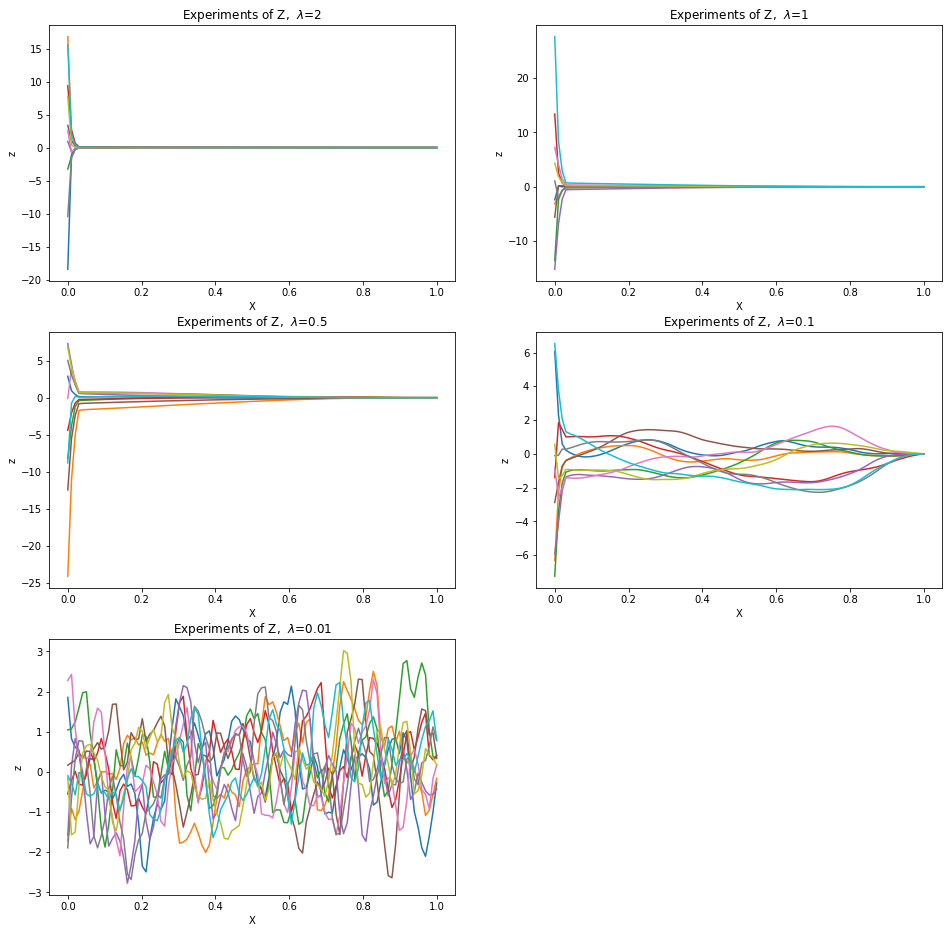

In [11]:
N = 100
fig, ax = plt.subplots(3, 2, figsize=(16, 16))
fig.delaxes(ax[2,1])
for i, lamb in enumerate([2, 1, 0.5, 0.1, 0.01]):
    for _ in range(10):
        g = np.random.normal(size=N)
        X = np.expand_dims(np.linspace(0, 1, N), 1)
        sigma = cov(X, lamb)
        try:
            L = np.linalg.cholesky(sigma)
        except:
            P, L, U = lu(sigma)
        z = L.T @ g
        ax[i//2, i%2].plot(X, z)
    ax[i//2, i%2].set_xlabel('X')
    ax[i//2, i%2].set_ylabel('z')
    ax[i//2, i%2].set_title(f"Experiments of Z,  $\\lambda$={lamb}")

As we can see in the graphics generated above, the $\lambda$ parameter acts as a damper parameter, controlling the frequency of z. For example, when $\lambda$ = 1 or 2, the exponential behavior in the beginning of the curve quickly stabilizes to 0, the expected mean of the original distribution ($\sim \mathcal N(0, \Sigma)$). As its value decreases, however, the observations of z begin to appear more instable and in a higher frequency.

This behavior can be observed in the same graphic while we change the value of $\lambda$ for a single experiment and `N = 200`. Another approach was also tried: at the place of using a Cholesky decomposition, use an LU decomposition, which would allow us to work with a larger value of N, bypassing the positive semidefinite issue and still getting a lower triangular matrix. Nevertheless the results found were very unstable and hard to draw a conclusion from.

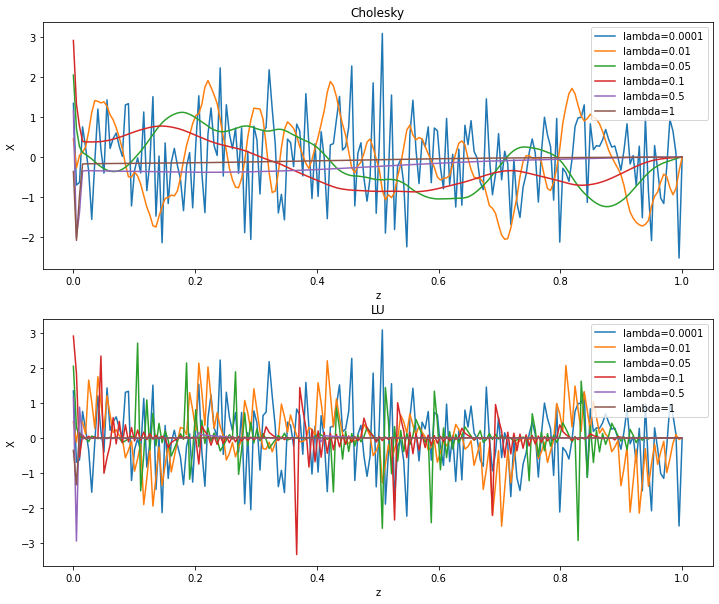

In [12]:
N = 200
g = np.random.normal(size=N)
X = np.expand_dims(np.linspace(0, 1, N), 1)
fig, (ax1, ax2) = plt.subplots(2)
for l in [0.0001, 0.01, 0.05, 0.1, 0.5, 1]:
    sigma = cov(X, l)
    L = np.linalg.cholesky(sigma)
    _, _, U = lu(sigma)
    z = L.T @ g
    z2 = U @ g
    #print(z.mean())
    ax1.plot(X, z, label=f"lambda={l}")
    ax2.plot(X, z2, label=f"lambda={l}")
ax1.legend()
ax1.set_xlabel("z")
ax1.set_ylabel("X")
ax2.set_xlabel("z")
ax2.set_ylabel("X")
ax1.set_title('Cholesky')
ax2.set_title('LU')
ax2.legend()
fig.set_size_inches(12, 10)

## 2. Estimation du paramètre $\lambda$ par maximum de vraisemblance

In [28]:
def covariance_function(xi, xj, lambda_):
    """Compute the kernel function"""
    k = 1 + abs(xi - xj) / lambda_ + (xi - xj) ** 2 / (3 * lambda_ ** 2)
    return k * exp(-abs(xi - xj) / lambda_)

def covariance_matrix(x, lambda_, x2=None):
    """Return the covariance matrix"""
    return np.array(
        [[covariance_function(xi, xj, lambda_) for xj in (x if x2 is None else x2)] for xi in x]
    )

def neg_log_likelihood(lambda_, x, z, n):
    """Compute the negative log likelihood"""
    lambda_ = float(lambda_) + 1 if lambda_ == 0 else lambda_ # to avoid lambda = 0
    sigma = covariance_matrix(x, lambda_)
    logdetS = slogdet(sigma)[1]
    invS = inv(sigma)
    return 0.5 * (n * log(2 * pi) + logdetS + z.T @ invS @ z)

Cholesky decompostion to compute L
lambda optimized :  0.07808758120847822


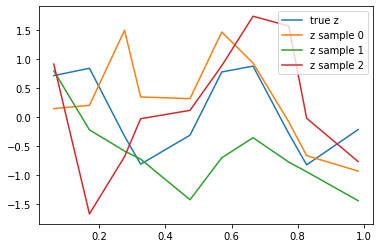

In [29]:
# Parameters
PLOT = True
n = 10

x = np.array([uniform(i / n, (i + 1) / n) for i in range(n)])
z = np.array([sin(4 * pi * xi) for xi in x])

# Minimize the negative log likelihood
min_lambda = minimize_scalar(neg_log_likelihood, args=(x, z, n))

if min_lambda.success:
    sol = min_lambda.x # lambda solution

    # ==============================================
    # Extra code
    min_sigma = covariance_matrix(x, sol)
    try:
        print("Cholesky decompostion to compute L")
        L = cholesky(min_sigma, lower=True)
    except:
        print("LU decompostion to compute L")
        P, L, U = lu(min_sigma)

    z_opt = [L.T @ np.random.normal(size=n) for _ in range(3)]

    print("lambda optimized : ", sol)
    if PLOT:
        plt.plot(x, z, label="true z")
        for i, z_ in enumerate(z_opt):
            plt.plot(x, z_, label=f"z sample {i}")
        plt.legend()
        plt.show()

We obtain a $\lambda$ value of approximately 0.8

## 3. Simuler plusieurs réalisations d'un processus Gaussien conditionné à un ensemble de données

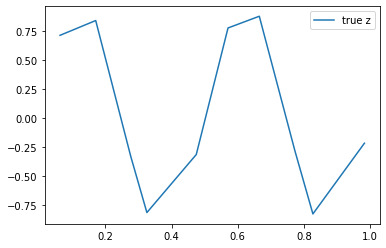

In [30]:
plt.plot(x, z, label="true z")
plt.legend()
plt.show()

In [31]:
def plot_flat(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.3)
    plt.plot(X, [sin(4 * np.pi * i) for i in X], label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

In [32]:
def posterior(X_s, X_train, Y_train, lambda_=1.0):
    """
    Compute mu_n and cov_n

    Parameters:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).

    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    """
    K_n = covariance_matrix(X_train, lambda_)
    K_n_N = covariance_matrix(X_train, lambda_, X_s)
    K_N = covariance_matrix(X_s, lambda_)
    K_inv = inv(K_n)

    mu_n = K_n_N.T.dot(K_inv).dot(Y_train)

    cov_n = K_N - K_n_N.T.dot(K_inv).dot(K_n_N)

    return mu_n, cov_n

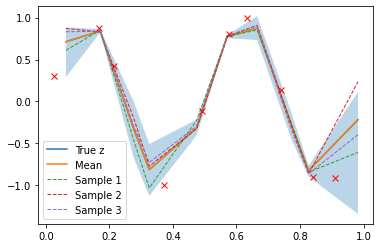

In [33]:
X = x
X_train = np.array([uniform(i / n, (i + 1) / n) for i in range(n)])
Y_train = np.sin(4 * np.pi * X_train)

# Mean and covariance of the prior
mu = np.zeros(z.shape)
cov = covariance_matrix(X, sol)

# Compute mean and covariance of the posterior distribution
mu_s, cov_s = posterior(X, X_train, Y_train, sol)

samples = np.random.multivariate_normal(z.ravel(), cov_s, 3)
plt.plot(x, z, label="True z")
plot_flat(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)
plt.legend()
plt.show()


---

# Problème 3
## 3.1 In order to simulate a Markov chain following the posterior law Gamma objective, modify the likelihood and prior of the "posterior" function of the algorithm MCMC

Similarly to the given notebook, we search to obtain an equivalent of our posterior function back from an estimation based on Poisson and Gamma.

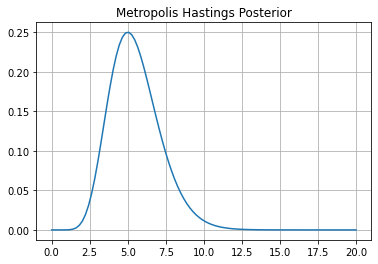

In [15]:
# We define the posterior distribution
k, lamb = 1, 1
def posterior(x, k, theta):
    return stats.gamma(k, scale=theta, loc=0).pdf(x)

# We define a wrapper function containing both the likelihood and the prior, as a product
def posterior_estim(x, k, lamb):
    prior = stats.gamma(k, scale=1/lamb, loc=0).pdf(x)
    return stats.poisson.pmf(10, x) * prior #stats.gamma.pdf(x,k,lamb)

# Plot the posterior
x_array = np.linspace(0, 20, 100)
y_array = np.asarray( [posterior(x, k+10, 1/(lamb+1)) for x in x_array] )

plt.plot(x_array,y_array)
plt.grid()
plt.title('Metropolis Hastings Posterior')
plt.show()
plt.close()

In the following Metropolis Hastings sampling, the posterior method which was given was renamed as `posterior_estim`, for estimated posterior, implying that our wrapper function differs from the function used to generate `y_array`.

In [16]:
# Metropolis Hastings sampling from the posterior distribution
N = 100000
s = 10
x = 0
p = posterior_estim(x,k,lamb)
samples = []
for i in range(N):
    xn = x + np.random.normal(size=1)
    pn = posterior_estim(xn,k,lamb)
    if pn >= p:
        p = pn
        x = xn
    else:
        u = np.random.rand()
        if u < pn/p:
            p = pn
            x = xn
    if i % s == 0:
        samples.append(float(x))
samples = np.array(samples)
samples = samples[int(len(samples)/2):]

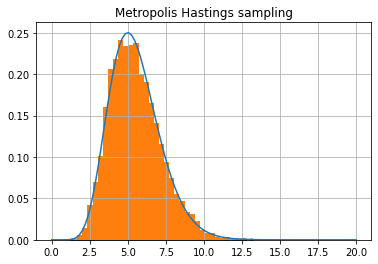

In [18]:
plt.scatter(samples, np.zeros_like(samples), s=10)
plt.plot(x_array,y_array)
plt.hist(samples, bins=35, density=True)
plt.title('Metropolis Hastings sampling')
plt.grid()
plt.show()
plt.close()

## 3.2 With the sample of 3.1 make a kernel approximation of the associated density and compare this estimated density with the true objective density of $\mathcal G(k + x, \lambda + 1)$

For the kernel density, we compared variation in results depending on the chosen kernels, but ultimately obtained very similar effects.
Another option here is the bandwith, enabling us to vary in curve tendency, and approach the true curve using a trade-off of stability (noise on the curve). A good approximation is given with bandwidth=0.5.

In [23]:
samples = samples.reshape(-1, 1)
create_kde = lambda bw: KernelDensity(kernel="gaussian", bandwidth=bw).fit(samples)
bandwidths = (0.5, 1, 0.1)
x_trunc = x_array[:, np.newaxis]

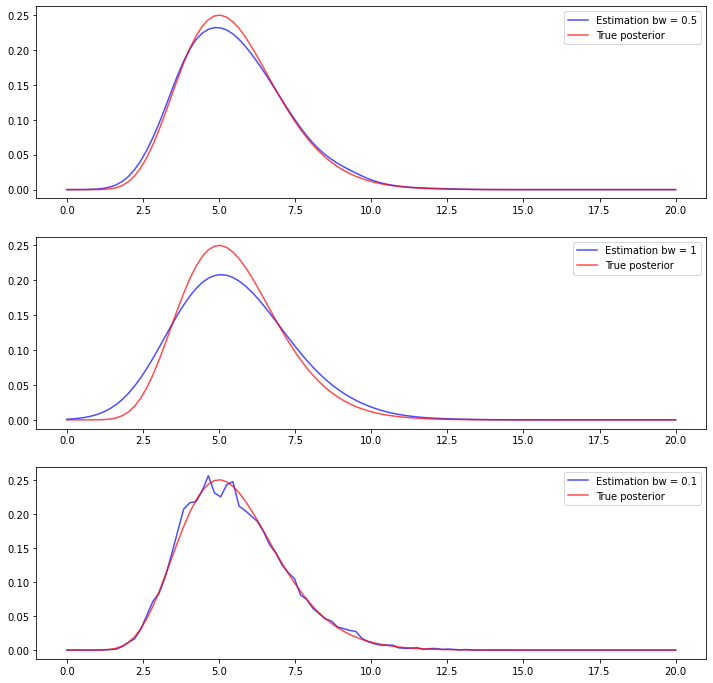

In [24]:
kdes = [create_kde(bw) for bw in bandwidths]
densities = [np.exp(kde.score_samples(x_trunc)) for kde in kdes]

fig, axs = plt.subplots(3, 1, figsize=(12, 12))
for i, density in enumerate(densities):
    axs[i].plot(x_array, density, "b", alpha=0.7, label=f"Estimation bw = {bandwidths[i]}")
    axs[i].plot(x_array, y_array, "r", alpha=0.7, label="True posterior")
    axs[i].legend()
plt.show()